In [1]:
import os
import sys

import matplotlib
import numpy as np
import pandas as pd
from utils import *
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import KFold

def preprocess_ela(train,test,id_columns):
    train=train.replace([np.inf, -np.inf], np.nan)
    test=test.replace([np.inf, -np.inf], np.nan)
    count_missing={column:train[column].isna().sum() for column in train.columns}
    count_missing=pd.DataFrame([count_missing]).T
    count_missing.columns=['missing']
    count_missing['missing_percent']=count_missing['missing'].apply(lambda x: x/train.shape[0])
    
    columns_to_keep=list(count_missing.query('missing_percent<0.1').index)
    print('Keeping columns', columns_to_keep)
    train=train[columns_to_keep]
    test=test[columns_to_keep]
    train = train.fillna(train.mean())
    test = test.fillna(train.mean())
    return train,test


seeds=[200,400,600,800,1000]
id_columns=['problem_id','instance_id','algorithm','dim','seed']
dimension=5

algorithm_names=['DE','PSO','ES']
feature_df=pd.DataFrame()
for algorithm in algorithm_names:

    algorithm_df=pd.read_csv(f'iteration_ela/{algorithm}_dim_{dimension}_all_runs.csv',index_col=[0,1,2,3,4], header=[0,1,2])
    feature_df=pd.concat([feature_df, algorithm_df])
    print(algorithm)
    print(algorithm_df.shape)

print('Original feature df', feature_df.shape)

DE
(12000, 2790)
PSO
(12000, 2790)
ES
(12000, 2790)
Original feature df (36000, 2790)


In [2]:
og_feature_df=feature_df.copy()

In [3]:
feature_df.columns=[f'{c[2]}_it_{c[1]}' for c in feature_df.columns]

In [4]:
import missingno as msno
from config import *

In [5]:
og_feature_df=og_feature_df.replace([np.inf, -np.inf], np.nan)

In [6]:
missing_by_ela_feature=og_feature_df.stack(level=0).stack(level=0)

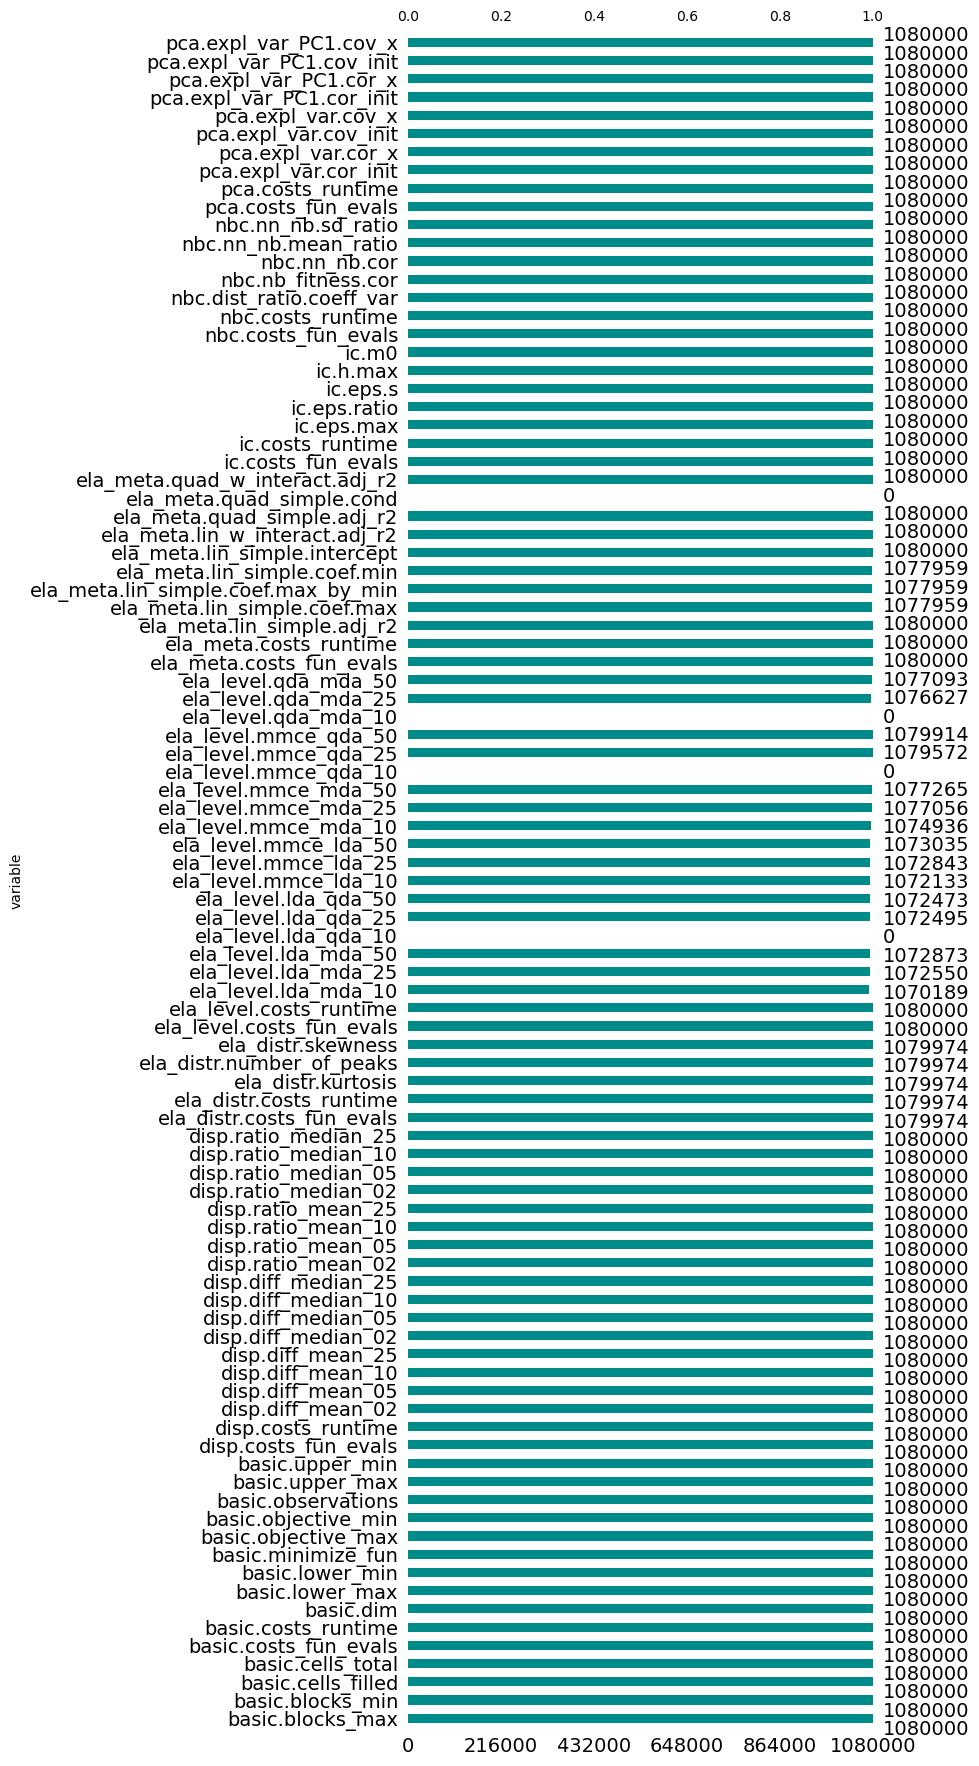

In [7]:
ax=msno.bar(missing_by_ela_feature, color=dark_cyan, fontsize=14, figsize=(6,22))

In [8]:
ax.set_xticks([])

[]

In [9]:
f=ax.figure

In [10]:
f.set_size_inches(7, 16)

In [11]:
f.tight_layout()

In [12]:
f.savefig('problem_classification_visualizations/ela_missing_values.pdf')